## <strong> 13. 시계열 전용 연산

필요한 라이브러리: ```yfinance```, ```pandas_datareader```

In [ ]:
!pip install yfinance

In [3]:
import yfinance as yf
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
# 구글 주식 데이터 로딩
goog = yf.download("005930.KS", start="2004-01-01", end="2024-12-31")
goog.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS
Date,,,,,
2004-01-01,6421.115723,6421.115723,6421.115723,6421.115723,0
2004-01-02,6392.641602,6449.591638,6357.047829,6421.116620,18940000
2004-01-05,6513.659180,6513.659180,6371.284116,6392.640375,22385000
2004-01-06,6549.251953,6648.914483,6527.895697,6648.914483,22405000
2004-01-07,6620.440430,6677.390455,6577.727911,6599.084170,19970000


In [6]:
# [+] 종가(Close) 데이터만 사용하기
goog = goog['Close']
goog

Ticker,005930.KS
Date,
2004-01-01,6421.115723
2004-01-02,6392.641602
2004-01-05,6513.659180
2004-01-06,6549.251953
2004-01-07,6620.440430
...,...
2024-12-23,52823.835938
2024-12-24,53712.460938
2024-12-26,52922.574219


<Axes: xlabel='Date'>

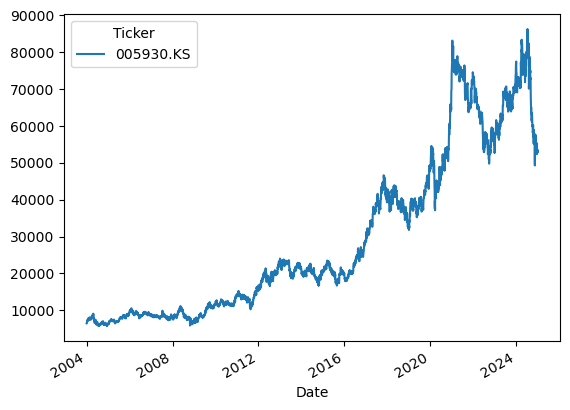

In [8]:
# [+] Lineplot 시각화
goog.plot()

#### <strong> 리샘플링(Resampling)
+ ```resample()```: 빈도를 기준으로 집계 연산
+ ```asfreq()```: 빈도 단위 별 데이터 선택

In [10]:
# [+] 다운샘플링: resample()
goog_downsampled = goog.resample('M').mean()
goog_downsampled

Ticker,005930.KS
Date,
2004-01-31,7160.495894
2004-02-29,7682.559448
2004-03-31,7770.584430
2004-04-30,8558.683882
2004-05-31,7269.604120
...,...
2024-08-31,75111.704241
2024-09-30,64873.456163
2024-10-31,58471.543750


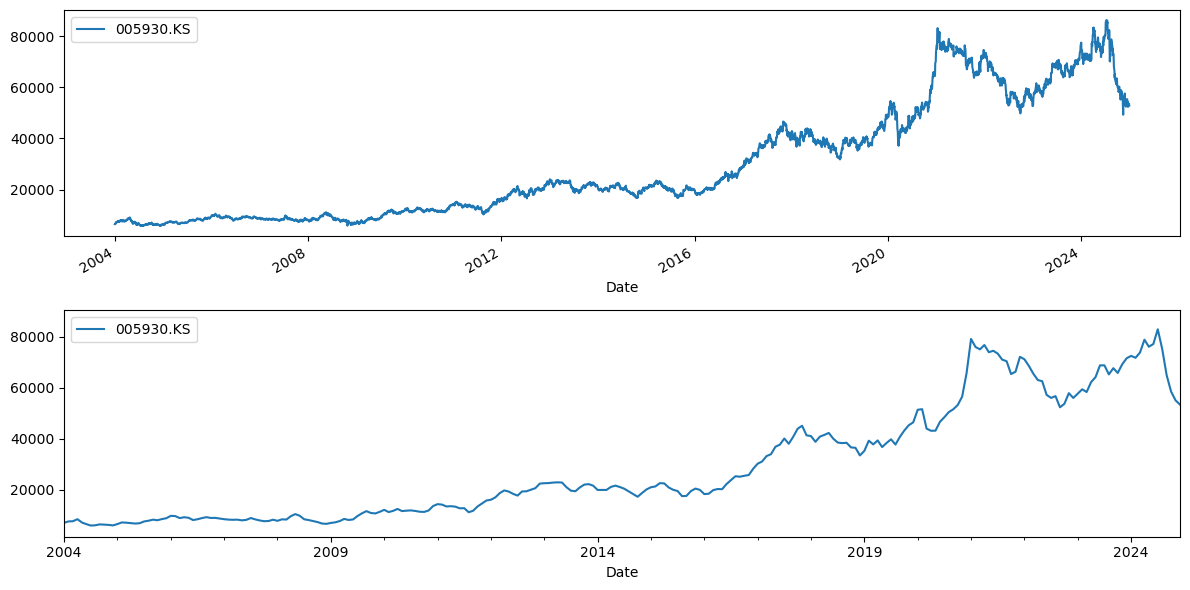

In [11]:
fig, ax = plt.subplots(2, 1, sharey=True, figsize=(12, 6))
goog.plot(label='original', ax=ax[0])
ax[0].legend()
goog_downsampled.plot(label='downsampled', ax=ax[1])
ax[1].legend()
plt.tight_layout()

Ticker         005930.KS
Date                    
2004-01-31           NaN
2004-02-29           NaN
2004-03-31   8143.856445
2004-04-30   7930.290039
2004-05-31   7204.179199
...                  ...
2024-07-31  82377.421875
2024-08-31           NaN
2024-09-30  60722.726562
2024-10-31  58451.796875
2024-11-30           NaN

[251 rows x 1 columns]


<Axes: xlabel='Date'>

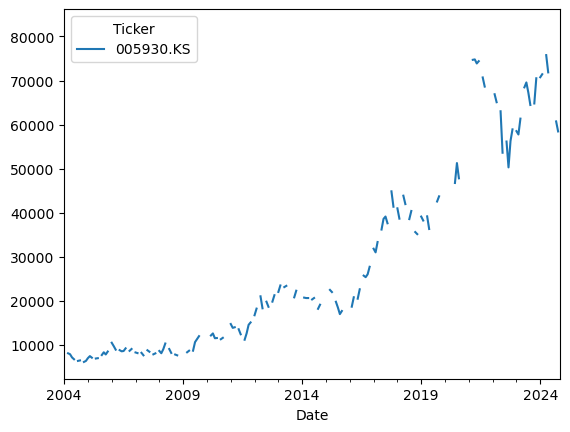

In [12]:
# [+] 다운샘플링: asfreq()
goog_downsampled = goog.asfreq('M')
print(goog_downsampled)

goog_downsampled.plot()

In [17]:
# [+] 업샘플링: resample()
goog_upsampled = goog.resample('12H').mean()
print(goog_upsampled)

Ticker                  005930.KS
Date                             
2004-01-01 00:00:00   6421.115723
2004-01-01 12:00:00           NaN
2004-01-02 00:00:00   6392.641602
2004-01-02 12:00:00           NaN
2004-01-03 00:00:00           NaN
...                           ...
2024-12-28 00:00:00           NaN
2024-12-28 12:00:00           NaN
2024-12-29 00:00:00           NaN
2024-12-29 12:00:00           NaN
2024-12-30 00:00:00  52885.792969

[15339 rows x 1 columns]


#### <strong> 시프팅(Shifting)
+ ```shift(periods)``` : ```periods``` 값 만큼 시계열 이동

In [18]:
# [+] 900일 뒤로 시프팅 적용
goog_shifted = goog.shift(periods=900)
goog_shifted

Ticker,005930.KS
Date,
2004-01-01,NaN
2004-01-02,NaN
2004-01-05,NaN
2004-01-06,NaN
2004-01-07,NaN
...,...
2024-12-23,75977.703125
2024-12-24,76620.031250
2024-12-26,76069.468750


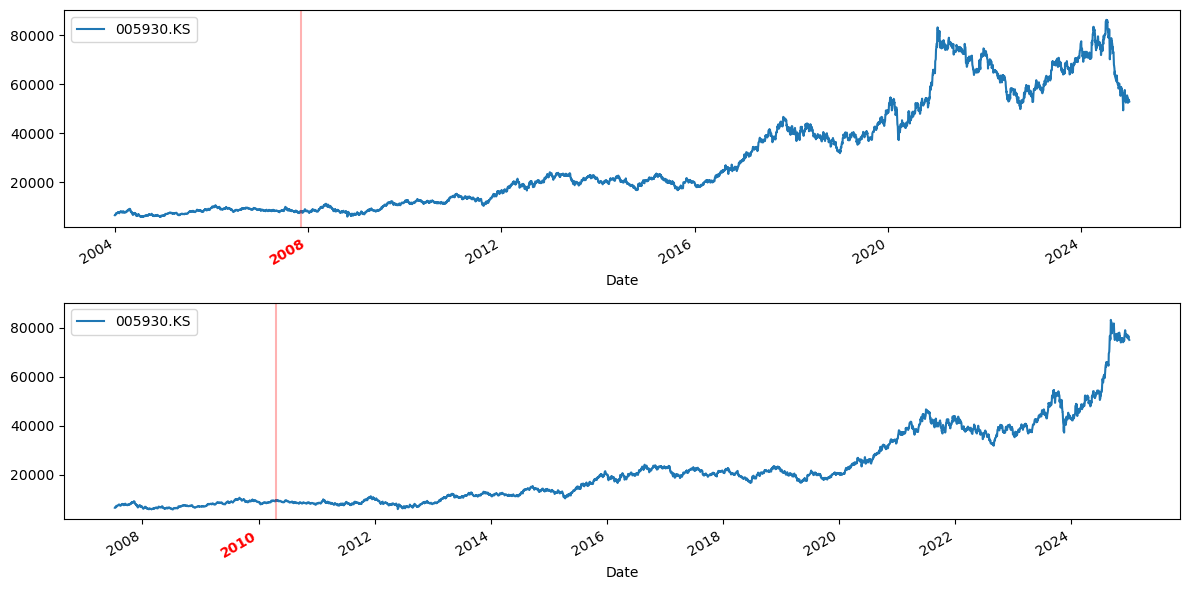

In [19]:
fig, ax = plt.subplots(2, 1, sharey=True, figsize=(12, 6))

# Legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

goog.plot(label='original', ax=ax[0])
ax[0].legend()
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

goog_shifted.plot(label='shifted 900 days', ax=ax[1])
ax[1].legend()
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

plt.tight_layout()

In [21]:
# shifting 응용: 주가 변화율 계산
goog_shifted = goog.shift(periods=1) # [+] 시프팅
(goog - goog_shifted)/goog_shifted # [+] 주가 변화율 계산

Ticker,005930.KS
Date,
2004-01-01,NaN
2004-01-02,-0.004434
2004-01-05,0.018931
2004-01-06,0.005464
2004-01-07,0.010870
...,...
2024-12-23,0.009434
2024-12-24,0.016822
2024-12-26,-0.014706


Ticker       005930.KS
Date                  
2004-01-01         NaN
2004-01-02  -28.474121
2004-01-05  121.017578
2004-01-06   35.592773
2004-01-07   71.188477
...                ...
2024-12-23  493.679688
2024-12-24  888.625000
2024-12-26 -789.886719
2024-12-27  460.265625
2024-12-30 -497.046875

[5219 rows x 1 columns]


<Axes: xlabel='Date'>

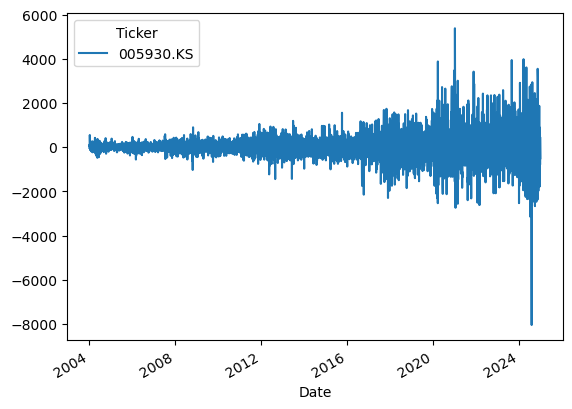

In [22]:
# shifting 응용: 차분 시계열 구하기
goog_diff =  goog - goog_shifted # [+] 차분
print(goog_diff)

goog_diff.plot()

#### <strong> 윈도잉(Windowing)

Rolling [window=365,center=False,axis=0,method=single]


<Axes: xlabel='Date'>

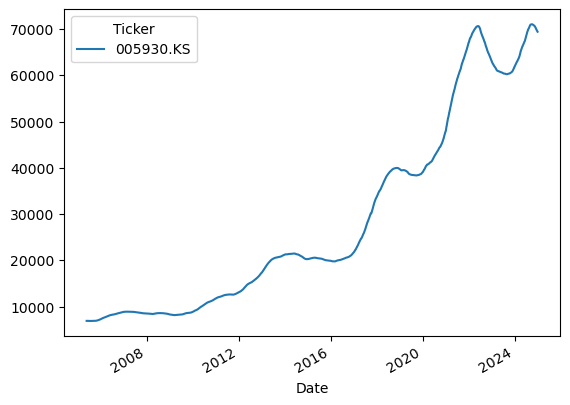

In [23]:
# [+] 365일 단위 윈도잉
goog_rolled = goog.rolling(365)
print(goog_rolled)

goog_rolled.mean().plot()

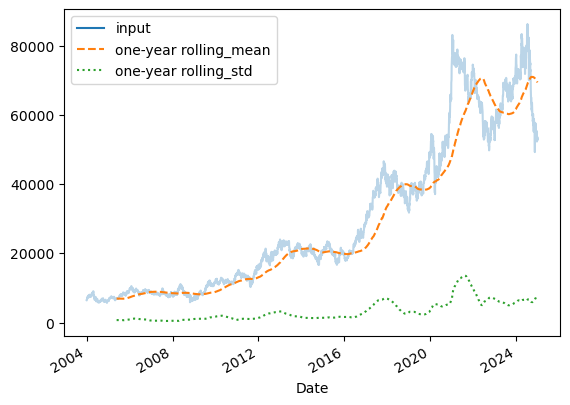

In [24]:
data = pd.DataFrame({'input': goog.values.flatten(),
                     # moving average
                     'one-year rolling_mean': goog_rolled.mean().values.flatten(), 
                     # standard deviation
                     'one-year rolling_std': goog_rolled.std().values.flatten()}, index=goog.index)
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)